In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
data_Trs = pd.read_excel(r'data/SimData_Transplant_Ver2.0.xls')

In [3]:
data_WL = pd.read_excel(r'data/SimData_WList_Ver2.0.xls')

In [4]:
data_WL.head()

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA,Time,Cens
0,Female,A,home,42.980695,24.281426,11.328118,8.490318,6905.806322,0
1,Male,O,inpt,43.194412,30.097404,15.295122,20.956402,4583.035351,0
2,Male,A,home,44.952546,30.445467,20.222330,28.063602,2434.090766,0
3,Male,B,home,48.929001,22.588535,16.742302,19.049439,946.529267,0
4,Male,B,home,52.098949,18.317275,19.038291,21.116394,1606.310627,0


In [5]:
data_Trs.head()

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,O,inpt,Male,B,No,1,54.291739,45.379636,24.712049,21.369229,22.939930,22.931727,2019.866962,0
1,Male,A,home,Male,O,No,157,59.817111,60.516200,28.887631,25.408853,18.985337,21.381548,1815.128065,1
2,Female,A,home,Male,A,No,49,63.198440,30.989861,26.869533,24.902931,23.694392,26.243047,396.556200,0
3,Male,O,inpt,Female,B,No,81,28.845900,41.142174,27.411596,35.396950,11.375444,8.545730,1326.259556,0
4,Male,O,home,Female,O,No,620,55.523918,49.138937,24.530967,29.372668,26.835544,29.211865,605.043515,0


In [6]:
data_Trs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Waittime,4000.0,157.904500,202.798546,0.000000,21.000000,86.500000,212.000000,2226.000000
Age_Tx,4000.0,51.863745,10.798603,18.000000,45.383451,52.784580,59.309607,74.000000
Donor_Age,4000.0,44.894614,16.752752,8.000000,33.312755,44.894645,56.113062,90.000000
TransplantBMI,4000.0,27.515993,5.500547,15.000000,23.749645,27.379522,30.951087,50.048231
Donor_BMI,4000.0,26.306614,4.811858,15.000000,23.112918,26.161590,29.344599,49.002473
MELD,4000.0,19.231782,8.337963,1.446141,13.214339,18.637852,23.492436,52.891065
MELDNA,4000.0,20.135877,8.706773,2.000000,13.522779,19.929507,25.479567,52.248202
Time,4000.0,2377.070449,2438.332231,0.491054,662.357847,1598.536584,3258.033333,19420.238850
Cens,4000.0,0.213250,0.409654,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
print(data_Trs.describe().transpose().to_latex())  

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &         mean &          std &        min &         25\% &          50\% &          75\% &           max \\
\midrule
Waittime      &  4000.0 &   157.904500 &   202.798546 &   0.000000 &   21.000000 &    86.500000 &   212.000000 &   2226.000000 \\
Age\_Tx        &  4000.0 &    51.863745 &    10.798603 &  18.000000 &   45.383451 &    52.784580 &    59.309607 &     74.000000 \\
Donor\_Age     &  4000.0 &    44.894614 &    16.752752 &   8.000000 &   33.312755 &    44.894645 &    56.113062 &     90.000000 \\
TransplantBMI &  4000.0 &    27.515993 &     5.500547 &  15.000000 &   23.749645 &    27.379522 &    30.951087 &     50.048231 \\
Donor\_BMI     &  4000.0 &    26.306614 &     4.811858 &  15.000000 &   23.112918 &    26.161590 &    29.344599 &     49.002473 \\
MELD          &  4000.0 &    19.231782 &     8.337963 &   1.446141 &   13.214339 &    18.637852 &    23.492436 &     52.891065 \\
MELDNA        &  4000.0 &    20.135877 &     8.706

In [8]:
temp_descp_Trs = data_Trs.describe(percentiles=[]).transpose()

temp_descp_WL = data_WL.describe(percentiles=[]).transpose()

In [9]:
temp_descp_Trs.drop(columns=['count'], inplace=True)

In [10]:
temp_descp_WL.drop(columns=['count'], inplace=True)

In [11]:
print(temp_descp_Trs.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &         mean &          std &        min &          50\% &           max \\
\midrule
Waittime      &   157.904500 &   202.798546 &   0.000000 &    86.500000 &   2226.000000 \\
Age\_Tx        &    51.863745 &    10.798603 &  18.000000 &    52.784580 &     74.000000 \\
Donor\_Age     &    44.894614 &    16.752752 &   8.000000 &    44.894645 &     90.000000 \\
TransplantBMI &    27.515993 &     5.500547 &  15.000000 &    27.379522 &     50.048231 \\
Donor\_BMI     &    26.306614 &     4.811858 &  15.000000 &    26.161590 &     49.002473 \\
MELD          &    19.231782 &     8.337963 &   1.446141 &    18.637852 &     52.891065 \\
MELDNA        &    20.135877 &     8.706773 &   2.000000 &    19.929507 &     52.248202 \\
Time          &  2377.070449 &  2438.332231 &   0.491054 &  1598.536584 &  19420.238850 \\
Cens          &     0.213250 &     0.409654 &   0.000000 &     0.000000 &      1.000000 \\
\bottomrule
\end{tabular}



In [12]:
data_WL.shape

(5000, 9)

In [13]:
print(temp_descp_WL.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &         mean &          std &        min &          50\% &           max \\
\midrule
Age    &    51.468621 &    10.954611 &  18.000000 &    52.890666 &     80.000000 \\
BMI    &    27.446418 &     5.442112 &   9.094571 &    27.388624 &     47.388168 \\
MELD   &    18.216495 &     8.915064 &   1.094491 &    16.694212 &     60.406139 \\
MELDNA &    18.948478 &     9.484574 &   1.095649 &    17.523199 &     62.402058 \\
Time   &  2266.635995 &  2438.798638 &   0.008729 &  1481.250679 &  21558.498266 \\
Cens   &     0.122800 &     0.328240 &   0.000000 &     0.000000 &      1.000000 \\
\bottomrule
\end{tabular}



In [14]:
data_Trs.columns

Index(['Gender', 'Bloodtype', 'Inpt_attx', 'Donor_Sex', 'Donor_Bloodtype',
       'Donor_DCD', 'Waittime', 'Age_Tx', 'Donor_Age', 'TransplantBMI',
       'Donor_BMI', 'MELD', 'MELDNA', 'Time', 'Cens'],
      dtype='object')

In [15]:
data_WL.columns

Index(['Gender', 'Bloodtype', 'Inpt_attx', 'Age', 'BMI', 'MELD', 'MELDNA',
       'Time', 'Cens'],
      dtype='object')

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'INPT',data=bldD)
plt.show()

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(data_Trs)
plt.show()

KeyboardInterrupt: 

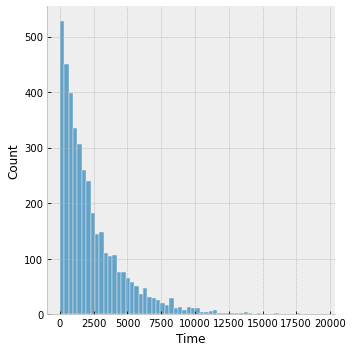

In [27]:
sns.displot(data_Trs.Time)

In [28]:
data_Trs.columns

Index(['Gender', 'Bloodtype', 'Inpt_attx', 'Donor_Sex', 'Donor_Bloodtype',
       'Donor_DCD', 'Waittime', 'Age_Tx', 'Donor_Age', 'TransplantBMI',
       'Donor_BMI', 'MELD', 'MELDNA', 'Time', 'Cens'],
      dtype='object')

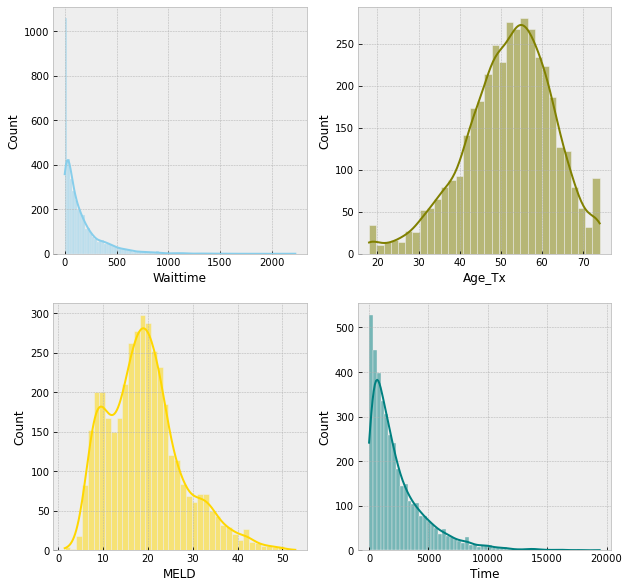

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=data_Trs, x="Waittime", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data_Trs, x="Age_Tx", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data_Trs, x="MELD", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data_Trs, x="Time", kde=True, color="teal", ax=axs[1, 1])

plt.show()

fig.savefig('numeric_dist_Trs_Data.png')